# Plotting a Gaussian normal curve with Python and Matplotlib 

GIVEN:

At a facility that manufactures electrical resistors, a statistical sample of 1-kΩ resistors is pulled from the production line. The resistor's resistances are measured and recorded. A mean resistance of 979.8 kΩ and a standard deviation of 73.10 kΩ represents the sample of resistors. The desired resistance tolerance for the $1-kΩ$ resistors is ± 10%. This tolerance range means the acceptable range of resistance is 900 Ω to 1100 Ω.
FIND:

Assuming a normal distribution, determine the probability that a resistor coming off the production line will be within spec (in the range of 900 Ω to 1100 Ω). Show the probability that a resistor picked off the production line is within spec on a plot.

In [1]:
# normal_curve.py

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
# if using a Jupyter notebook, inlcude:
%matplotlib inline

Next, we need to define the constants given in the problem.   
The mean is 979.8 and the standard deviation is 73.10.    
The lower bound is 900 and the upper bound is 1100. 

In [2]:
# define constants
mu = 998.8 
sigma = 73.10
x1 = 900
x2 = 1100

Next, we calculate the Z-transform of the lower and upper bound using the mean and standard deviation defined above.

In [3]:
# calculate the z-transform
z1 = ( x1 - mu ) / sigma
z2 = ( x2 - mu ) / sigma

After the Z-transform of the lower and upper bounds are calculated,    
we calculate the probability with SciPy's ```scipy.stats.norm.pdf()``` function.

In [4]:
x = np.arange(z1, z2, 0.001) # range of x in spec
x_all = np.arange(-10, 10, 0.001) # entire range of x, both in and out of spec
# mean = 0, stddev = 1, since Z-transform was calculated
y = norm.pdf(x,0,1)
y2 = norm.pdf(x_all,0,1)

Finally, we build the plot. Note how Matplotlib's ```ax.fill_between()``` method is used to highlight the area of interest.    
We'll use Matplotlib's 'fivethirtyeight' style and save the figure as 'normal_curve.png'.

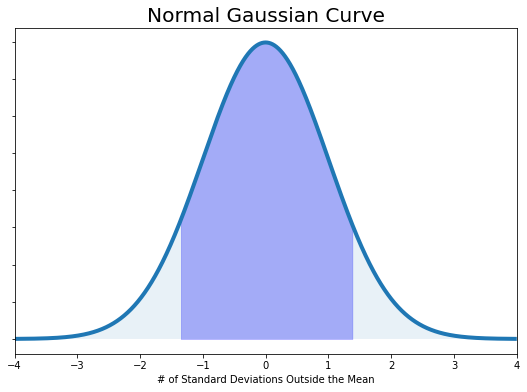

In [5]:
# build the plot
fig, ax = plt.subplots(figsize=(9,6))
plt.style.use('fivethirtyeight')
ax.plot(x_all,y2)

ax.fill_between(x,y,0, alpha=0.3, color='b')
ax.fill_between(x_all,y2,0, alpha=0.1)
ax.set_xlim([-4,4])
ax.set_xlabel('# of Standard Deviations Outside the Mean')
ax.set_yticklabels([])
ax.set_title('Normal Gaussian Curve')

# plt.savefig('normal_curve.png', dpi=72, bbox_inches='tight')
plt.show()